<a href="https://colab.research.google.com/github/lewis738/scikit_learning/blob/main/01_02_scikit_learn_Tutorials(A_tut_on_statistical_learning_for_scitific_data_precessing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A tutorial on statistical-learning for scientific data processing

 > **Statistical learnig 统计学习**
 > 
 > 机器学习这项技术的重要性随着实验科学所面临数据量的快速增长而不断增长，它所能解决的问题从建立不同观测之间的拟合模型，到不同观测之间的分类，又或是学习无标签数据集的数据内在分布结构。
 >
 >这个部分教程将会介绍*统计学习*——使用机器学习方法来对数据进行推理（根据手上的的数据得出结论）。
 >
 >Scikit-learn是一个Python模块，它将经典的机器学习算法与科学计算的包 ([NumPy](https://www.numpy.org/), [SciPy](https://scipy.org/), [matplotlib](https://matplotlib.org/)) 紧密地结合在了一起。

# Statistical learning: the setting and the estimator object in scikit-learn 统计学习：scikit-learn中的设置和ertimator对象 [链接](https://scikit-learn.org/stable/tutorial/statistical_inference/settings.html)

## Datasets 数据集

scikit-learn 可以处理一个或多个二维数组代表的数据集；可以理解为：一个多维观察的结果列表，我们说这些数组的第一维是采样轴`samples axis`,第二维是特征轴`features axis`。

In [ ]:
# scikit-learn中提供的一个简单例子：鸢尾花数据集
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
data.shape

(150, 4)

  > **Iris数据集**由150个对鸢尾花的观测构成，每次观测包含4个特征：sepal萼片和petal花瓣的length长和width宽，这四个特征在`iris.DESCR`中有描述；

若数据集没有初始化为`(n_samples, n_features)`结构，需要先进行预处理`preprocess`才能使用scikit-learn中进行处理。

 > **对手写数字数据集进行重构的例子**
 >
 > 手写数字数据集由1797个8×8的图片构成

In [ ]:
digits = datasets.load_digits()
digits.images.shape

(1797, 8, 8)

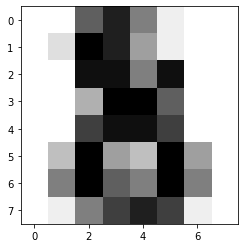

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[-1],
           cmap=plt.cm.gray_r)

 > 要想在这个数据集上使用scikit-learn，我们先transform每个8×8的图片为一个64元素的向量。

In [ ]:
data = digits.images.reshape(
    (digits.images.shape[0], -1)
    ) #reshape为(记录条数,-1表示自动计算总尺寸/记录条数)

## Estimators objects 估计器对象

  *  **`拟合数据Fitting data`**：scikit-learn实现的主要API就是`estimator估计器`，估计器是可以从数据进行学习的任何一个对象，可以是分类、回归、聚类算法或者数据变换（特征提取、抽取、过滤）操作。
  
  一个估计器对象暴露了`fit`方法，用于获取数据（一般是二维数组）：

In [ ]:
estimator.fit(data)

NameError: ignored

  *  **估计器参数 Estimator parameters**：估计器的所有参数都可以在实例化时给定，或者通过相应的属性进行更改：

In [ ]:
estimator = Estimator(param1=1, param2=2)
estimator.param1

  *  **估计的参数 Estimated parameters**：当估计器学习/fit了数据后，就根据数据估计出了参数的值，所有估计的参数都是估计器对象的【带下划线的属性】

In [ ]:
estimator.estimated_param_ 

# Supervised learning: predicting an output variable from high-dimensional observations [链接](https://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html)

 > **监督学习解决的问题**
 > 
 > [监督学习](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)包括学习两个数据集之间的关系：观测数据`X`和我们想要预测的外部变量`y`常称为“目标”、“标签”，大多时候，`y`是一一维数组，长度为`n_samples`;
 >
 >sklearn中所有的[`估计器estimator`](https://en.wikipedia.org/wiki/Estimator)都实现了`fit(X,y)`方法，用于拟合模型，`predict(X)`方法，用于预测无标签的观测`X`的预测标签`y`。


 > **名词：分类和回归**
 > 
 >*  **`分类 Classification 任务`**：预测的任务是将观测根据一组有限的标签进行划分，换句话说，给观测对象一个名字；
 >*  **`回归 Regression 任务`**：目标是预测一个连续目标变量的值。
 > 
 > 在用sklearn做分类时，y是一个整型/字符串类新的向量
 >
 > **注意**：请查看[Intro to M.L. with sklearn页面](https://scikit-learn.org/stable/tutorial/basic/tutorial.html#introduction)，快速浏览sklearn中涉及的机器学习术语


## Nearest neighbor and the curse of dimensionality

 > **给鸢尾花数据集分类：**
 > 
 > 鸢尾花数据集是一个用于分类的数据集，希望根据花瓣和萼片的长宽对三种鸢尾花（Setosa, Versicolour 和 Virginica）进行分类。

In [ ]:
import numpy as np
from sklearn import datasets
iris_X, iris_y = datasets.load_iris(return_X_y=True)
np.unique(iris_y)

array([0, 1, 2])

[![鸢尾花数据集](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_dataset_001.png)](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

### k-Nearest neighbors classifier k近邻分类器

最简单的分类器估计就是[最邻近分类器](https://en.wikipedia.org/wiki/K-nearest_neighbor_algorithm)了：给定一个新的观测`X_test`，在训练集（即estimator拟合的目标）中进行查找特征向量最近的一个观测（请查看[scikit-learn在线文档中最邻近分类的部分](https://scikit-learn.org/stable/modules/neighbors.html#neighbors)，获取有关这个分类器的详细信息）

 > **Training set and testing set 训练集和测试集**
 >
 > 在对任何学习算法进行实验时，非常重要的一点是不要用训练集中 estimator fit 过的数据来测试估计器，因为这无法检测估计器对于**新数据**的预测能力；这也是我们将数据集划分为训练集和测试集的原因。
 
 KNN (k nearest neighbors) 分类的例子:

[![KNN (k nearest neighbors) 分类的例子](https://scikit-learn.org/stable/_images/sphx_glr_plot_classification_001.png)](https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html)

In [ ]:
# Split iris data in train and test data
# A random permutation, to split the data randomly
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)

KNeighborsClassifier()

In [ ]:
knn.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [ ]:
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

### The curse of dimensionality 维度灾难

为了让估计器能更有效，需要使相近点之间的距离小于某个值$d$，这个只取决于特定的问题。在一维问题中，平均需要$ n\sim 1/d $个点。在前面的k-NN例子中，若数据只由一个特征描述，取值为0-1，并且训练集有n个样例，那么新的数据与它的距离不会超过$ 1/n $，因此，最邻近分类效果的决定性因素是$1/n$小于不同类之间的特征差异尺度。

若特征数为$p$，那么需要$n\sim1/d^p$个点；例如我们在一维中，需要10个点，那么在$p$维中则需要$10^p$个点，铺展在[0,1]空间中，当$p$增大时，一个好的估计器所需的训练样本数会爆炸式地增长。

例如：若每个点都只是单个数(8 bytes)，对于特征维度较小的 $p \sim 20$ 的k-NN 分类器需要的数据大小将比整个互联网的数据量还大（>1000Exabytes）

这就叫[维数灾难](https://en.wikipedia.org/wiki/Curse_of_dimensionality)，是机器学习遇到的主要问题。

## Linear model: from regression to sparsity 从回归到稀疏

 > **糖尿病数据集 diabetes dataset**
 >
 >糖尿病数据集由基于442个病人的10个生理变量，以及一个一年后疾病进展的指示组成。

In [ ]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test  = diabetes_X[-20:]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test  = diabetes_y[-20:]

因此这个问题的主要任务是从生理变量预测疾病的进程。

### Linear regression 线性回归

[LinearRegression 线性回归](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)，最简单的形式是通过调整一组参数，使得模型拟合的于给定数据集的平方差`squared residuals`尽可能小。

线性模型：$y=X\beta+\epsilon$


*   `X`：数据
*   `y`：目标变量
*   `β`：系数
*   `ϵ`：观测噪声



[![线性回归示意图](https://scikit-learn.org/stable/_images/sphx_glr_plot_ols_001.png)](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [ ]:
print(regr.coef_) 

[ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]


In [ ]:
# The mean square error
np.mean((regr.predict(diabetes_X_test) - diabetes_y_test)**2)

2004.5676026898211

In [ ]:
# Explained variance score: 1 is perfect prediction
# and 0 means that there is no linear relationship
# between X and y.
regr.score(diabetes_X_test, diabetes_y_test)

0.5850753022690574

### Shrinkage 收缩？

若每个维度的数据都很少，那么观测的噪声方差就很大

In [ ]:
X = np.c_[ .5, 1].T
y = [.5, 1]
test = np.c_[ 0, 2].T
regr = linear_model.LinearRegression()

import matplotlib.pyplot as plt
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

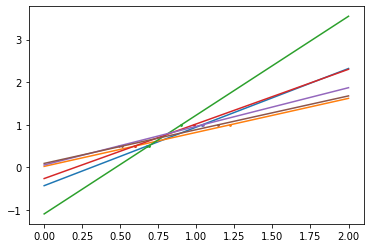

In [ ]:
np.random.seed(0)
for _ in range(6):
    this_X = .1 * np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test))
    plt.scatter(this_X, y, s=3)

对高维数据进行机器学习的一个办法是将回归系数降为0：任意选取的两个观测子集大概率是不相关的，这就叫 [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) regression 岭回归

In [ ]:
regr = linear_model.Ridge(alpha=.1)

plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

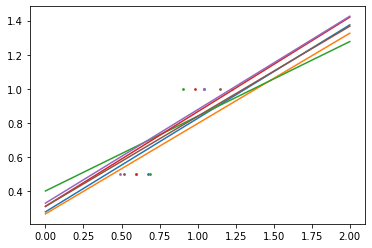

In [ ]:
np.random.seed(0)
for _ in range(6):
    this_X = .1 * np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test))
    plt.scatter(this_X, y, s=3)

这就是方差/偏置权衡的一个例子：岭回归的惩罚系数`alpha`越大，偏置`bias`越大、`variance`方差越小。

我们可以选出一个`alpha`来最小化剩余的误差，这里用的是糖尿病数据集而不是我们的合成数据：

In [ ]:
alphas = np.logspace(-4, -1, 6)
print([regr.set_params(alpha=alpha)
           .fit(diabetes_X_train, diabetes_y_train)
           .score(diabetes_X_test, diabetes_y_test)
       for alpha in alphas])

[0.5851110683883533, 0.5852073015444674, 0.585467754069849, 0.5855512036503914, 0.583071708555416, 0.570589994372801]


 > **注意：**
 >
 > **过拟合overfitting**：模型捕捉了过多的噪声，而失去了对新来数据的泛化能力
 
 > **[正则数regularization](https://en.wikipedia.org/wiki/Regularization_%28machine_learning%29)**：岭回归引入的偏置

### Sparsity 稀疏

**只拟合特征1和2**

[![](https://scikit-learn.org/stable/_images/sphx_glr_plot_ols_3d_001.png)](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols_3d.html)
[![](https://scikit-learn.org/stable/_images/sphx_glr_plot_ols_3d_003.png)](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols_3d.html)
[![](https://scikit-learn.org/stable/_images/sphx_glr_plot_ols_3d_002.png)](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols_3d.html)

 > **注意**：完整的糖尿病数据集包括11维（10个特征变量和一个目标变量），很难建立一个直观的感觉，但记住这是一个相当稀疏的空间可能是有用的。

我们可以看到，尽管特征2与整个模型有种很强的相关性，但考虑特征1则会发现他只能提供很少的有关`y`的信息。

为了改善问题的求解条件（即缓解[维度灾难](https://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html#curse-of-dimensionality)），只选择含有效信息多的特征而将不含信息的特征（如特征2）全部置为0。对于岭回归，它会减少这些不含信息特征的作用，但不是置为0；另一种惩罚方法，Lasso回归（Least Absolute Shrinkage and selection operator）可以将一些系数置为0。这样的叫做稀疏方法，稀疏可以被视为奥卡姆剃刀原理的应用：更喜欢简单的模型。

In [ ]:
regr = linear_model.Lasso()
scores = [regr.set_params(alpha=alpha)
              .fit(diabetes_X_train, diabetes_y_train)
              .score(diabetes_X_test, diabetes_y_test)
          for alpha in alphas]
best_alpha = alphas[scores.index(max(scores))]
regr.alpha = best_alpha
regr.fit(diabetes_X_train, diabetes_y_train)

Lasso(alpha=0.025118864315095794)

In [ ]:
print(regr.coef_)

[   0.         -212.43764548  517.19478111  313.77959962 -160.8303982
   -0.         -187.19554705   69.38229038  508.66011217   71.84239008]


 > **解决同一问题的不同算法**
 >
 > 不同算法可用于解决同一数学问题，例如scikit-learn中的`Lasso`对象用[坐标下降法](https://en.wikipedia.org/wiki/Coordinate_descent)解决了lasso回归问题，这在大数据集上很高效。但scikit-learn中也提供了[LassoLars](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLars.html#sklearn.linear_model.LassoLars)对象，使用的是LARS算法，它对权重向量的估计结果非常稀疏的问题较高效（即观测样本很少的问题）

### Classification 分类

对分类问题，例如标记[鸢尾花](https://en.wikipedia.org/wiki/Iris_flower_data_set)的任务中，线性回归并不是正确的方法，因为它会给给远离决策边界的点更大的权重（下图）；一种线性的实现方法是拟合sigmoid函数或者logistic函数（下图）：



[![](https://scikit-learn.org/stable/_images/sphx_glr_plot_logistic_001.png)](https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic.html)

$y=sigmoid(X\beta-offset)+\epsilon=\frac{1}{1+exp(-X\beta+offset)}+\epsilon$

In [ ]:
log = linear_model.LogisticRegression(C=1e5)
log.fit(iris_X_train, iris_y_train)

LogisticRegression(C=100000.0)

这叫[LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)

[![](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_logistic_001.png)](https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html)

> **多分类问题**
>
> 若你有多个类别需要预测，一种常用方法是你和一个one-versus-all分类器，然后用投票决定最终结果。


> **用Logistic回归 收缩Shrinkage和稀疏sparsity**
> 
> 参数C控制了[LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression/)对象的正则化程度：C大则正则化程度低;penalty="l2" 引入[收缩](https://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html#shrinkage)(即，非稀疏系数)，而 penalty="l1"引入[稀疏性](https://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html#sparsity)。

> **练习**
>
> 尝试用最邻近算法和线性模型对手写数字数据集进行分类，留下最后10%的数据作为测试机集，测试预测性能。
> 相关代码可以在[这里下载](https://scikit-learn.org/stable/_downloads/e4d278c5c3a8450d66b5dd01a57ae923/plot_digits_classification_exercise.py)

In [ ]:
from sklearn import datasets, neighbors, linear_model

X_digits, y_digits = datasets.load_digits(return_X_y=True)
X_digits = X_digits / X_digits.max()

## Support vector machines (SVMs)

### Linear SVMs 线性支持向量机

[支持向量机（Support Vector Machine）](https://scikit-learn.org/stable/modules/svm.html#svm)属于判别式模型家族：尝试找到一组样例的组合，构造出一个超平面，能够最大化两个类之间的间隔。正则化由参数`C`控制：`C`较小表示间隔由划分直线附近的大量点计算得到（正则化程度强）；`C`较大表示间隔由划分直线附近的少数点计算（正则化程度弱）。

**Unregularized SVM 未正则化的SVM**

[![未正则化 Unregularized SVM](https://scikit-learn.org/stable/_images/sphx_glr_plot_svm_margin_001.png)](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html)

**Regularized SVM (default) 正则化的SVM（默认参数C）**
[![Regularized SVM (default)](https://scikit-learn.org/stable/_images/sphx_glr_plot_svm_margin_002.png)](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html)

> **例子：**
>
> [Iris鸢尾花数据集上绘制不同SVM分类器的结果](https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html#sphx-glr-auto-examples-svm-plot-iris-svc-py)

支持向量机可用于：

*  回归：[SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR)，即支持向量回归（Support Vector Regression）；
*  分类：[SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC),即支持向量分类（Support Vector Classification）

In [ ]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(iris_X_train, iris_y_train)

SVC(kernel='linear')

> **警告：标准化数据**
> 对很多估计器，包括SVMs，要想得到一个好的预测结果，对数据进行标准化unit standard deviation是必须的。

### 使用核函数

各个类别的数据在特征空间的分布不总是线性的，解决方法是构造一个非线性（可能是多项式）函数。实现方法是核函数，可以认为他通过在观测样本中加入核函数从而获得了决策的能力。

### Linear kernel 线性核函数

In [ ]:
svc = svm.SVC(kernel='linear')

[![](https://scikit-learn.org/stable/_images/sphx_glr_plot_svm_kernels_001.png)](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html)

### Polynomial kernel 多项式核函数

In [ ]:
svc = svm.SVC(kernel='poly',
              degree=3)
# degree: polynomial degree

[![](https://scikit-learn.org/stable/_images/sphx_glr_plot_svm_kernels_002.png)](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html)

### RBF kernel 径向基核函数（Radial Basis Function）

In [ ]:
svc = svm.SVC(kernel='rbf')
# gamma: inverse of size of
# radial kernel

[![](https://scikit-learn.org/stable/_images/sphx_glr_plot_svm_kernels_003.png)](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html)

> Interactive example 交互式样例
>
> 前往[SVM GUI](https://scikit-learn.org/stable/auto_examples/applications/svm_gui.html#sphx-glr-auto-examples-applications-svm-gui-py)页面下载`svm_gui.py`文件；用右侧和左按钮添加两个类的数据点，拟合模型并更改参数和数据。

> **练习：**
> 
> 尝试用SVMs，鸢尾花 iris 数据集的前两个特征对第1、2类进行分类，留10%的数据作为测试集，测试模型的预测性能。
>
> **警告：**数据是按照类型排序的，不要直接留最后的10%数据，那只有一个类型。
>
> **提示:**可以在网格上使用`decision_function`方法来获得直觉
>
> 答案可以在[这里](https://scikit-learn.org/stable/_downloads/a3ad6892094cf4c9641b7b11f9263348/plot_iris_exercise.py)下载

In [ ]:
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

[![](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_dataset_001.png)](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

# Model selection: choosing estimators and their parameters 模型选择：选择估计器和参数 [链接](https://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html)

## Score, and cross-validated scores 评分、交叉验证评分

如我们所见，每个estimator都暴露了`score`方法，用于评价fit（或者prediction）的质量，**score越大越好**。

In [6]:
from sklearn import datasets, svm
X_digits, y_digits = datasets.load_digits(return_X_y=True)
svc = svm.SVC(C=1, kernel='linear')
svc.fit(X_digits[:-100], y_digits[:-100]).score(X_digits[-100:], y_digits[-100:])
# 先fit了后100行数据，然后对这后100行数据上的fit效果进行评分

0.98

为了更好的评价预测精度（可以大致认为是模型fit训练的好坏），可以连续地将数据划分为用于训练和预测的*folds折*；叫做k折交叉验证（[kFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold) crossvalidation）

In [7]:
import numpy as np
X_folds = np.array_split(X_digits, 3)
y_folds = np.array_split(y_digits, 3)
scores = list()
for k in range(3):
    # We use 'list' to copy, in order to 'pop' later on
    X_train = list(X_folds)
    X_test = X_train.pop(k)
    X_train = np.concatenate(X_train)
    y_train = list(y_folds)
    y_test = y_train.pop(k)
    y_train = np.concatenate(y_train)
    scores.append(svc.fit(X_train, y_train).score(X_test, y_test))
print(scores)

[0.9348914858096828, 0.9565943238731218, 0.9398998330550918]


## Cross-validation generators

Scikit-learn中有一系列类，可用于为流行的交叉验证策略生成训练集/测试集地索引列表。

这些类暴露了一个`split`方法，用于接收要被划分的输入数据集，然后返回对于所选交叉验证策略的每次迭代的训练集、测试集的索引列表。
`split`方法的使用。

In [8]:
from sklearn.model_selection import KFold, cross_val_score
X = ["a", "a", "a", "b", "b", "c", "c", "c", "c", "c"]
k_fold = KFold(n_splits=5)
for train_indices, test_indices in k_fold.split(X):
     print('Train: %s | test: %s' % (train_indices, test_indices))

Train: [2 3 4 5 6 7 8 9] | test: [0 1]
Train: [0 1 4 5 6 7 8 9] | test: [2 3]
Train: [0 1 2 3 6 7 8 9] | test: [4 5]
Train: [0 1 2 3 4 5 8 9] | test: [6 7]
Train: [0 1 2 3 4 5 6 7] | test: [8 9]


在此基础上，执行交叉验证就很方便了：

In [9]:
[svc.fit(X_digits[train], y_digits[train]).score(X_digits[test], y_digits[test])
 for train, test in k_fold.split(X_digits)]

[0.9638888888888889,
 0.9222222222222223,
 0.9637883008356546,
 0.9637883008356546,
 0.9303621169916435]

交叉验证的评分可以直接用 [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) 计算得到，给定一个估计器，交叉验证对象和输入数据，[cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) 将数据集进行划分，用训练集进行训练，在交叉验证的每个测试集上计算评分。

默认情况下，估计器的`score`方法用于计算单独的评分。

参考[metrics module ](https://scikit-learn.org/stable/modules/metrics.html#metrics) 了解更多关于评分的方法。

In [10]:
cross_val_score(svc, X_digits, y_digits, cv=k_fold, n_jobs=-1)

array([0.96388889, 0.92222222, 0.9637883 , 0.9637883 , 0.93036212])

`n_jobs=-1`表示调用电脑的所有CPU进行计算。

另外，`scoring`参数可以用于指定其他的评分算法。

In [11]:
cross_val_score(svc, X_digits, y_digits, cv=k_fold,
                scoring='precision_macro')

array([0.96578289, 0.92708922, 0.96681476, 0.96362897, 0.93192644])

**Cross-validation generators 交叉验证生成器**
* **[KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold) (n_splits, shuffle, random_state)**

  划分为k折，其中k-1折作为训练集，剩下的一个作为测试集；

* **[StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) (n_splits, shuffle, random_state)**

  与k折相同，但保留每个折内的类分布；

* **[GroupKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupKFold.html#sklearn.model_selection.GroupKFold) (n_splits)**

  确保同一组不同时出现在测试和训练集中。
***
*  **[ShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit) (n_splits, test_size, train_size, random_state)**

  基于随机排列生成训练集、测试集；
* **[StratifiedShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit)**

  与ShuffleSplit相同，但保留每个折内的类分布；
* **[GroupShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupShuffleSplit.html#sklearn.model_selection.GroupShuffleSplit)**

  确保同一组不同时出现在测试和训练集中。
***
* **[LeaveOneGroupOut](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneGroupOut.html#sklearn.model_selection.LeaveOneGroupOut) ()**

  每次留下一组观测样本；
* **[LeavePGroupsOut](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeavePGroupsOut.html#sklearn.model_selection.LeavePGroupsOut) (n_groups)**

  每次留下p组观测样本；
* **[LeaveOneOut](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html#sklearn.model_selection.LeaveOneOut) ()**

  每次留些一个观测样本；
***
* **[LeavePOut](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeavePOut.html#sklearn.model_selection.LeavePOut) (p)**

  Leave P observations out.
* **[PredefinedSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.PredefinedSplit.html#sklearn.model_selection.PredefinedSplit)**
  基于预定义的划分生成训练集和测试集。

> **练习：**
> 
> 在手写数字数据集上，将线性核函数的SVC估计器的交叉验证评分绘制在曲线图上，其中参数`C`作为变量（1-10的对数网格）

In [12]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import datasets, svm

X, y = datasets.load_digits(return_X_y=True)

svc = svm.SVC(kernel="linear")
C_s = np.logspace(-10, 0, 10)

scores = list()
scores_std = list()

[![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_digits_001.png)](https://scikit-learn.org/stable/auto_examples/exercises/plot_cv_digits.html)

**答案：**[基于手写数字数据集的交叉验证](https://scikit-learn.org/stable/auto_examples/exercises/plot_cv_digits.html#sphx-glr-auto-examples-exercises-plot-cv-digits-py)

## Grid-search and cross-validated estimators

### Grid-search 网格搜索

scikit-learn提供了一个对象，给定数据，就能计算估计器在参数网格中拟合的评分，并选择一个参数，以最大化交叉验证评分，这个对象在构建时，需要一个估计器，并最终暴露出一个估计器API：

In [13]:
from sklearn.model_selection import GridSearchCV, cross_val_score
Cs = np.logspace(-6, -1, 10)
clf = GridSearchCV(estimator=svc, param_grid=dict(C=Cs),
                   n_jobs=-1)
clf.fit(X_digits[:1000], y_digits[:1000])  

GridSearchCV(estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1.00000000e-06, 3.59381366e-06, 1.29154967e-05, 4.64158883e-05,
       1.66810054e-04, 5.99484250e-04, 2.15443469e-03, 7.74263683e-03,
       2.78255940e-02, 1.00000000e-01])})

In [14]:
clf.best_score_      

0.95

In [15]:
clf.best_estimator_.C   

0.0021544346900318843

In [16]:
# Prediction performance on test set is not as good as on train set
clf.score(X_digits[1000:], y_digits[1000:])   

0.946047678795483

**默认情况下：**

[GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)使用5折交叉验证，但若它检测到应该用分类器，而不是回归器，它将使用stratified 5-fold 交叉验证。  

> **Nested cross-validation 内嵌的交叉验证**

In [17]:
cross_val_score(clf, X_digits, y_digits) 

array([0.94722222, 0.91666667, 0.96657382, 0.97493036, 0.93593315])

> 并行地进行了两个交叉验证循环：其中一个用的是[GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)估计器，来确定`gamma`的值；另一个是`cross_val_score`来测算估计器的预测无非偏见估计`unbiased estimates`
>

> **警告：**不能在并行计算（`n_jobs`≠1）中内嵌对象

### Cross-validated estimators 交叉验证估计器

用交叉验证确定模型参数更高效的方式是用an algorithm-by-algorithm basis，在这种方式下，对特定的估计器，scikit-learn暴露了[交叉验证：评估估计器性能](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)的估计器，可以自动地通过交叉验证确定模型参数

In [18]:
from sklearn import linear_model, datasets
lasso = linear_model.LassoCV()
X_diabetes, y_diabetes = datasets.load_diabetes(return_X_y=True)
lasso.fit(X_diabetes, y_diabetes)

LassoCV()

In [19]:
# The estimator chose automatically its lambda:
lasso.alpha_

0.003753767152692203

这种估计器的名字与对应的估计器类似，只是在名称后面附加了“CV”。

> **练习：**
>
> 在糖尿病数据集上，找到最佳的正则化参数alpha.
>
> **另外:**你对这个alpha的选择有多信任？
> **答案：**[Cross-validation on diabetes Dataset Exercise](https://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#sphx-glr-auto-examples-exercises-plot-cv-diabetes-py)

In [20]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

X, y = datasets.load_diabetes(return_X_y=True)
X = X[:150]
y = y[:150]

# Unsupervised learning: seeking representations of the data [链接](https://scikit-learn.org/stable/tutorial/statistical_inference/unsupervised_learning.html) 

> **聚类解决的问题**
>
> 给定鸢尾花Iris数据集，若我们知道有3种类型的鸢尾花，但没有分类学家来帮我们做标签：就可以尝试聚类——将观测样本划分为区分明显的组，叫做**簇**。

### K-means clustering k-means聚类

注意：有很多不同的聚类准则和相关的算法，其中最简单的就是[k-means聚类](https://scikit-learn.org/stable/modules/clustering.html#k-means)。

[![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_iris_002.png)](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html)

In [29]:
from sklearn import cluster, datasets
X_iris, y_iris = datasets.load_iris(return_X_y=True)

k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X_iris)
print(k_means.labels_[::10])
print(y_iris[::10])

[1 1 1 1 1 2 2 2 2 2 0 0 0 0 0]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


> **警告：**聚类算法绝对没有保证恢复原始事实。
>* 首先，选择正确的聚类数量很难。
>* 其次，该算法对初始化敏感，并且可以陷入局部极小值，尽管scikit-learn用了几个技巧来缓解这个问题。

<figure >
<a href="https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html"><img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_iris_003.png" style="width: 252.0px; height: 189.0px;" /></a>
<figcaption>
<p><span><strong>Bad initialization</strong></span></p>
</figcaption>
</figure>
<figure >
<a href="https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html"><img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_iris_001.png" style="width: 252.0px; height: 189.0px;" /></a>
<figcaption>
<p><span ><strong>8 clusters</strong></span></p>
</figcaption>
</figure>
<figure >
<a href="https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html"><img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_iris_004.png" style="width: 252.0px; height: 189.0px;" /></a>
<figcaption>
<p><span ><strong>Ground truth</strong></span></p>
</figcaption>
</figure>


**不要过度解读聚类的结果**

> **应用示例：矢量量化**
>
> 一般来说，聚类，特别是KMeans，可以看作是一种选择少量样本来压缩信息的方法。这类问题一般叫[向量量化vector quantization](https://en.wikipedia.org/wiki/Vector_quantization)。例如，可以用来给一张图做色调分离：

In [30]:
import scipy as sp
try:
   face = sp.face(gray=True)
except AttributeError:
   from scipy import misc
   face = misc.face(gray=True)
X = face.reshape((-1, 1)) # We need an (n_sample, n_feature) array
k_means = cluster.KMeans(n_clusters=5, n_init=1)
k_means.fit(X)

values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape

Guide中给出的结果对比：

<figure >
<a href="https://scikit-learn.org/stable/auto_examples/cluster/plot_face_compress.html"><img  src="https://scikit-learn.org/stable/_images/sphx_glr_plot_face_compress_001.png" /></a>
<figcaption>
<p><span ><strong>Raw image</strong></span></p>
</figcaption>
</figure>
<figure >
<a href="https://scikit-learn.org/stable/auto_examples/cluster/plot_face_compress.html"><img  src="https://scikit-learn.org/stable/_images/sphx_glr_plot_face_compress_003.png" /></a>
<figcaption>
<p><span ><strong>K-means quantization</strong></span></p>
</figcaption>
</figure>
<figure>
<a href="https://scikit-learn.org/stable/auto_examples/cluster/plot_face_compress.html"><img  src="https://scikit-learn.org/stable/_images/sphx_glr_plot_face_compress_002.png" /></a>
<figcaption>
<p><span ><strong>Equal bins</strong></span></p>
</figcaption>
</figure>

<figure >
<a href="https://scikit-learn.org/stable/auto_examples/cluster/plot_face_compress.html"><img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_face_compress_004.png" /></a>
<figcaption>
<p><span "><strong>Image histogram</strong></span></p>
</figcaption>
</figure>

### Hierarchical agglomerative clustering: Ward 分层聚合聚类:**？

[层次聚类](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering)方法是一种聚类分析，目标是建立具有层次结构的簇。总的来说，这种算法的各种方法主要分为两大类：


*   **Agglomerative 聚合式：**

   自底向上的方法：每个观测样本最开始自己是一个簇，簇之间逐步合并，以符合**linkage**准则。这个方法在样本数小的时候比较有趣，样本数较大时，比k-means聚类在计算上更高效。
*   **Divisive 分列式：**
   
   自顶向下的方法：最开始，所有的样本都在一个簇中，随着层次的下降，逐步拆分。对需要拆分为大量簇时，这个方法又慢（从一个簇开始循环拆分），统计上又不合适。


### Connectivity-constrained clustering

在分层聚类基础上，给定一个连通图，就可以指出哪些样例可以被聚在一起，scikit-learn中的图用他们的邻接矩阵adjacency matrix表示，通常，用的是稀疏矩阵。这个方法很有用，例如在对一张图进行聚类时，用来检索连接区域（有时也称为相连成分）【搜寻连接在一起的图像区域】

[![](https://scikit-learn.org/stable/_images/sphx_glr_plot_coin_ward_segmentation_001.png)](https://scikit-learn.org/stable/auto_examples/cluster/plot_coin_ward_segmentation.html)

In [ ]:
from skimage.data import coins
from scipy.ndimage.filters import gaussian_filter
from skimage.transform import rescale
rescaled_coins = rescale(
    gaussian_filter(coins(), sigma=2),
    0.2, mode='reflect', anti_aliasing=False, multichannel=False
)
X = np.reshape(rescaled_coins, (-1, 1))

我们需要一个矢量化的图像，`rescaled_coins`是一个降维后的硬币图像，用于加速进程：

In [ ]:
from sklearn.feature_extraction import grid_to_graph
connectivity = grid_to_graph(*rescaled_coins.shape)

定义数据的图像结构，与相邻像素相连的像素：

In [ ]:
n_clusters = 27  # number of regions

from sklearn.cluster import AgglomerativeClustering
ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward',
                               connectivity=connectivity)
ward.fit(X)

In [ ]:
label = np.reshape(ward.labels_, rescaled_coins.shape)

### Feature agglomeration 特征聚集

## Clustering: grouping observations together

我们知道，稀疏化可以用于去除维数灾难（即，样本远小于该特征数所需的样本数）。另一种方法是将相似的特征合并：**特征聚集 feature agglomeration**，这个方法可以用在特征方向上的聚类实现，换句话说，对转换后的数据进行聚类。

[![](https://scikit-learn.org/stable/_images/sphx_glr_plot_digits_agglomeration_001.png)](https://scikit-learn.org/stable/auto_examples/cluster/plot_digits_agglomeration.html)

In [ ]:
digits = datasets.load_digits()
images = digits.images
X = np.reshape(images, (len(images), -1))
connectivity = grid_to_graph(*images[0].shape)

agglo = cluster.FeatureAgglomeration(connectivity=connectivity,
                                     n_clusters=32)
agglo.fit(X)

In [ ]:
X_reduced = agglo.transform(X)

In [ ]:
X_approx = agglo.inverse_transform(X_reduced)
images_approx = np.reshape(X_approx, images.shape)

> `transform` 和 `inverse_transform` 方法
>
> 部分估计器暴露了`transform`方法，用于降低数据集的维数。

## Decompositions: from a signal to components and loadings 分解：从信号到组分和负载

> **Components and loadings 组分和负载**
>
> 若X为多变量的数据，我们尝试解决的问题是将其重写到不同的观测维度上：我们想要学习负载L和一系列的组分C，让$X=LC$。不同的标准可以用于选择组分。

### Principal component analysis: PCA 主成分分析

[主成分分析（Principal component analysis,PCA）](https://scikit-learn.org/stable/modules/decomposition.html#pca)选择了连续的组分，可以最大化该变量上的方差。

<p ><a href="https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_3d.html"><img  src="https://scikit-learn.org/stable/_images/sphx_glr_plot_pca_3d_001.png" style="width: 280.0px; height: 210.0px;" /></a> <a href="https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_3d.html"><img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_pca_3d_002.png" style="width: 280.0px; height: 210.0px;" /></a></p>


上图中基于样本的点云在一个方向上的分布比较平坦：说明三个单变量特征中的一个几乎可以使用其他两个精确计算出来。主成分分析发现数据的方向不是平坦的？？

当用于转换数据时，PCA可以通过在将原始数据投影到子空间来降低数据的维度。

In [ ]:
# Create a signal with only 2 useful dimensions
x1 = np.random.normal(size=100)
x2 = np.random.normal(size=100)
x3 = x1 + x2
X = np.c_[x1, x2, x3]

from sklearn import decomposition
pca = decomposition.PCA()
pca.fit(X)

print(pca.explained_variance_)  

In [ ]:
# As we can see, only the 2 first components are useful
pca.n_components = 2
X_reduced = pca.fit_transform(X)
X_reduced.shape

### Independent Component Analysis: ICA 独立成分分析

[独立成分分析（Independent Component Analysis, ICA）](https://scikit-learn.org/stable/modules/decomposition.html#ica)选出成分，使得其负载的分布带有最大数量的独立信息。它能够恢复非高斯独立信号：

[![](https://scikit-learn.org/stable/_images/sphx_glr_plot_ica_blind_source_separation_001.png)](https://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_blind_source_separation.html)



In [ ]:
# Generate sample data
import numpy as np
from scipy import signal
time = np.linspace(0, 10, 2000)
s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal
S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise
S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1], [1.5, 1, 2]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Compute ICA
ica = decomposition.FastICA()
S_ = ica.fit_transform(X)  # Get the estimated sources
A_ = ica.mixing_.T
np.allclose(X,  np.dot(S_, A_) + ica.mean_)

# Putting it all together 串起来 [链接](https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html)

## Pipelining

我们看到，有些估计器可以进行数据变换，一些可以用来预测变量，我们还可以创建估计器的组合，例如：


```python
# 实际代码见链接 https://scikit-learn.org/stable/auto_examples/compose/plot_digits_pipe.html
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[("pca", pca), ("logistic", logistic)])

X_digits, y_digits = datasets.load_digits(return_X_y=True)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    "pca__n_components": [5, 15, 30, 45, 64],
    "logistic__C": np.logspace(-4, 4, 4),
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spectrum
pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    search.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)
ax0.legend(prop=dict(size=12))
```

Guide中给出的图片：
[![结果](https://scikit-learn.org/stable/_images/sphx_glr_plot_digits_pipe_001.png)](https://scikit-learn.org/stable/auto_examples/compose/plot_digits_pipe.html)

## Face recognition with eigenfaces

这个示例中用的数据集是从[“Labeled faces in the world”](http://vis-www.cs.umass.edu/lfw/)中摘录并经预处理得到的：

http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)


```python
"""
===================================================
Faces recognition example using eigenfaces and SVMs
===================================================

The dataset used in this example is a preprocessed excerpt of the
"Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)

.. _LFW: http://vis-www.cs.umass.edu/lfw/

Expected results for the top 5 most represented people in the dataset:

================== ============ ======= ========== =======
                   precision    recall  f1-score   support
================== ============ ======= ========== =======
     Ariel Sharon       0.67      0.92      0.77        13
     Colin Powell       0.75      0.78      0.76        60
  Donald Rumsfeld       0.78      0.67      0.72        27
    George W Bush       0.86      0.86      0.86       146
Gerhard Schroeder       0.76      0.76      0.76        25
      Hugo Chavez       0.67      0.67      0.67        15
       Tony Blair       0.81      0.69      0.75        36

      avg / total       0.80      0.80      0.80       322
================== ============ ======= ========== =======

"""

from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC


# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format="%(asctime)s %(message)s")


# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


# #############################################################################
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


# #############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print(
    "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0])
)
t0 = time()
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))


# #############################################################################
# Train a SVM classification model

print("Fitting the classifier to the training set")
t0 = time()
param_grid = {
    "C": [1e3, 5e3, 1e4, 5e4, 1e5],
    "gamma": [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
}
clf = GridSearchCV(SVC(kernel="rbf", class_weight="balanced"), param_grid)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)


# #############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))


# #############################################################################
# Qualitative evaluation of the predictions using matplotlib


def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set


def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(" ", 1)[-1]
    true_name = target_names[y_test[i]].rsplit(" ", 1)[-1]
    return "predicted: %s\ntrue:      %s" % (pred_name, true_name)


prediction_titles = [
    title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])
]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()
```



Guide页面中给出的结果：

![](https://scikit-learn.org/stable/_images/plot_face_recognition_1.png)

**Prediction 预测**

![](https://scikit-learn.org/stable/_images/plot_face_recognition_2.png)

**Eigenfaces 特征脸**

数据集中5个最具代表性的人预期结果：


<div class="highlight-default notranslate"><div class="highlight"><pre><span></span>                   <span class="n">precision</span>    <span class="n">recall</span>  <span class="n">f1</span><span class="o">-</span><span class="n">score</span>   <span class="n">support</span>
<span class="n">Gerhard_Schroeder</span>       <span class="mf">0.91</span>      <span class="mf">0.75</span>      <span class="mf">0.82</span>        <span class="mi">28</span>
  <span class="n">Donald_Rumsfeld</span>       <span class="mf">0.84</span>      <span class="mf">0.82</span>      <span class="mf">0.83</span>        <span class="mi">33</span>
       <span class="n">Tony_Blair</span>       <span class="mf">0.65</span>      <span class="mf">0.82</span>      <span class="mf">0.73</span>        <span class="mi">34</span>
     <span class="n">Colin_Powell</span>       <span class="mf">0.78</span>      <span class="mf">0.88</span>      <span class="mf">0.83</span>        <span class="mi">58</span>
    <span class="n">George_W_Bush</span>       <span class="mf">0.93</span>      <span class="mf">0.86</span>      <span class="mf">0.90</span>       <span class="mi">129</span>

## Open problem: Stock Market Structure

我们可以通过给定的时间框架预测谷歌的股票价格的变化吗？

[Learning a graph structure](https://scikit-learn.org/stable/auto_examples/applications/plot_stock_market.html#stock-market)